In [ ]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import utils

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/linear_regression


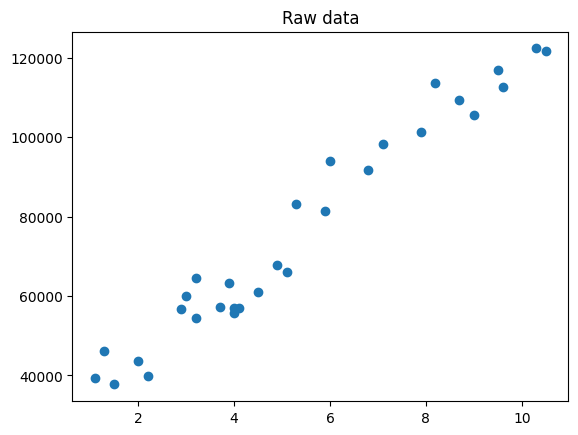

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')
X = data['YearsExperience'].values
y = data['Salary'].values

plt.scatter(X, y)
plt.title('Raw data')
plt.show()


In [ ]:
def ErrorMean(price,predictionprice):
  diff = price - predictionprice
  return np.sqrt(np.dot(diff, diff) / len(price))

In [ ]:
def square_Trick(bias , weigth , x,y,learningRate):
  predictions = bias + weigth*x
  bias += learningRate * (y - predictions)
  weigth += learningRate * (y - predictions) * x
  return bias , weigth

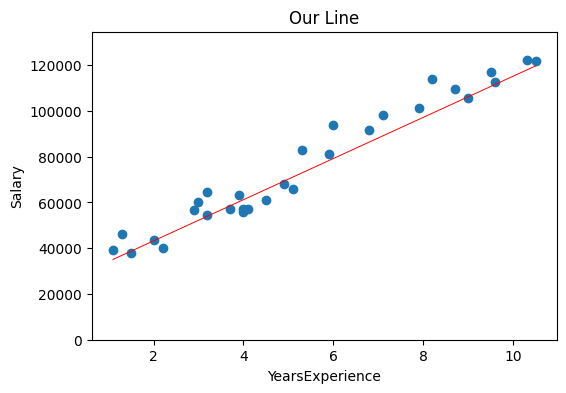

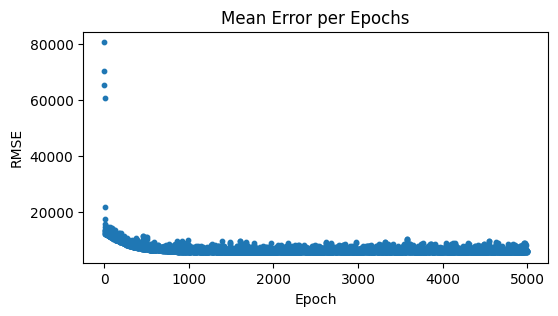

Final parameters -> bias = 25201.90, weight = 9001.42


In [ ]:
def LinearRegression(x, y, learningRate=0.01, epochs=500):
    bias = random.random()
    weight = random.random()
    Error = []

    for epoch in range(epochs):
        Pred = bias + weight * x
        Error.append(ErrorMean(y, Pred))
        Point = random.randint(0, len(x)-1)
        Features = x[Point]
        Labels = y[Point]
        bias, weight = square_Trick(bias, weight, Features, Labels, learningRate)

    plt.figure(figsize=(6,4))
    utils.plot_points(x, y)
    utils.draw_line(weight, bias, 'red', starting=x.min(), ending=x.max())
    plt.title('Our Line')
    plt.xlabel('YearsExperience'); plt.ylabel('Salary')
    plt.ylim(0, y.max() * 1.1)
    plt.show()

    plt.figure(figsize=(6,3))
    plt.scatter(range(len(Error)), Error, s=10)
    plt.title('Mean Error per Epochs')
    plt.xlabel('Epoch'); plt.ylabel('RMSE')
    plt.show()

    return bias, weight

bias, weight = LinearRegression(X, y, learningRate=0.01, epochs=5000)

print(f'Final parameters -> bias = {bias:.2f}, weight = {weight:.2f}')

In [ ]:
# Linear regression using sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)
print(f'Final parameters -> bias = {reg.intercept_:.2f}, weight = {reg.coef_[0]:.2f}')



# Prediction
reg.predict([[4.3]])

Final parameters -> bias = 25792.20, weight = 9449.96


array([66427.03818093])

Epoch 1: Loss=6502955270.7333, w=9547.9740, b=1520.0600
Epoch 11: Loss=144379201.1985, w=12829.9688, b=3015.1951
Epoch 21: Loss=135184201.4185, w=12689.6756, b=3960.6323
Epoch 31: Loss=126736698.1560, w=12555.2004, b=4866.8252
Epoch 41: Loss=118975924.5606, w=12426.3070, b=5735.4035
Epoch 51: Loss=111846053.7659, w=12302.7638, b=6567.9285
Epoch 61: Loss=105295797.2838, w=12184.3486, b=7365.8968
Epoch 71: Loss=99278036.0626, w=12070.8487, b=8130.7427
Epoch 81: Loss=93749481.5374, w=11962.0599, b=8863.8411
Epoch 91: Loss=88670364.2353, w=11857.7869, b=9566.5097
Epoch 100: Loss=84453167.6025, w=11767.6469, b=10173.9392

Training finished!
Final w: 11767.6469, Final b: 10173.9392


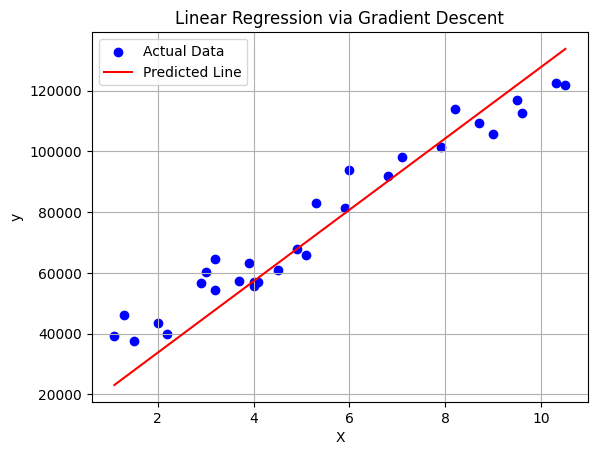

In [ ]:
# Gradient Descent for Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')
X = data['YearsExperience'].values
y = data['Salary'].values

# 2. Parameters
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 100

# 3. Training loop
n = len(X)

for i in range(epochs):
    # Prediction
    prediction = w * X + b

    # Cost (MSE)
    loss = (1/n) * np.sum((prediction - y) ** 2)

    # Gradients
    slope_w = (2/n) * np.sum((prediction - y) * X)
    slope_b = (2/n) * np.sum(prediction - y)

    # Update parameters
    w = w - learning_rate * slope_w
    b = b - learning_rate * slope_b

    if i % 10 == 0 or i == epochs - 1:
        print(f"Epoch {i+1}: Loss={loss:.4f}, w={w:.4f}, b={b:.4f}")

print("\nTraining finished!")
print(f"Final w: {w:.4f}, Final b: {b:.4f}")
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, w * X + b, color='red', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression via Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# Correct train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_prediction = reg.predict(X_test)

# Evaluate
MSE = mean_squared_error(y_test, y_prediction)

# Output
print("Test predictions:", y_prediction)
print("Mean Squared Error on Test Set:", MSE)
print("Model weight:", reg.coef_[0])
print("Model bias:", reg.intercept_)


Test predictions: [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
Mean Squared Error on Test Set: 49830096.85590839
Model weight: 9423.815323030976
Model bias: 25321.583011776813
